# EDA

# Librerias

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

# Cargar los Datos

In [492]:
dfWind = pd.read_csv("data_treino_dv_df_2000_2010.csv")
dfWind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [493]:
# Renombrar columnas con nombres más cortos
dfWind.rename(columns={
    'HORA (UTC)': 'Hora',
    'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'DicVientoH',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'VelVientoH',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'HumRel_Max_HAnt',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'HumRel_Min_HAnt',
    'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temp_Max_HAnt',
    'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temp_Min_HAnt',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'HumRelH',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'PresAtmosH',
    'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'PrecipHo',
    'VENTO, RAJADA MAXIMA (m/s)': 'Rafag_Max',
    'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'PresAtmos_Max_HAnt',
    'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'PresAtmos_Min_HAnt'
}, inplace=True)
dfWind.head()

,Hora,DicVientoH,VelVientoH,HumRel_Max_HAnt,HumRel_Min_HAnt,Temp_Max_HAnt,Temp_Min_HAnt,HumRelH,PresAtmosH,PrecipHo,Rafag_Max,PresAtmos_Max_HAnt,PresAtmos_Min_HAnt
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


### Descripción de tipos de variables

In [471]:
dfWind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hora                87693 non-null  object 
 1   DicVientoH          87693 non-null  float64
 2   VelVientoH          87693 non-null  float64
 3   HumRel_Max_HAnt     87693 non-null  float64
 4   HumRel_Min_HAnt     87693 non-null  float64
 5   Temp_Max_HAnt       87693 non-null  float64
 6   Temp_Min_HAnt       87693 non-null  float64
 7   HumRelH             87693 non-null  float64
 8   PresAtmosH          87693 non-null  float64
 9   PrecipHo            87693 non-null  float64
 10  Rafag_Max           87693 non-null  float64
 11  PresAtmos_Max_HAnt  87693 non-null  float64
 12  PresAtmos_Min_HAnt  87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


- **Hora**: Hora - (cadena de texto)
- **DicVientoH**: Dirección del viento horaria - (número decimal)
- **VelVientoH**: Velocidad horaria del viento (m/s) - (número decimal)
- **HumRel_Max_HAnt**: Humedad rel. máx. hora anterior (AUT) (%) - (número decimal)
- **HumRel_Min_HAnt**: Humedad rel. mín. hora anterior (AUT) (%) - (número decimal)
- **Temp_Max_HAnt**: Temperatura máx. hora anterior (AUT) (°C) - (número decimal)
- **Temp_Min_HAnt**: Temperatura mín. hora anterior (AUT) (°C) - (número decimal)
- **HumRelH**: Humedad relativa horaria (%) - (número decimal)
- **PresAtmosH**: Presión atmosférica a nivel de estación, horaria (mB) - (número decimal)
- **PrecipHo**: Precipitación total por hora (mm) - (número decimal)
- **Rafag_Max**: Máxima ráfaga de viento (m/s) - (número decimal)
- **PresAtmos_Max_HAnt**: Presión atmosférica máx. hora anterior (AUT) (mB) - (número decimal)
- **PresAtmos_Min_HAnt**: Presión atmosférica mín. hora anterior (AUT) (mB) - (número decimal)


### Datos Faltantes

In [472]:
dFaltantes = dfWind.isnull().sum()
fPercentage = (dFaltantes/len(dfWind)) * 100
missingInfo = pd.DataFrame({'Datos Faltantes': dFaltantes, 'Porcentaje': fPercentage})
print(missingInfo)

                    Datos Faltantes  Porcentaje
Hora                              0         0.0
DicVientoH                        0         0.0
VelVientoH                        0         0.0
HumRel_Max_HAnt                   0         0.0
HumRel_Min_HAnt                   0         0.0
Temp_Max_HAnt                     0         0.0
Temp_Min_HAnt                     0         0.0
HumRelH                           0         0.0
PresAtmosH                        0         0.0
PrecipHo                          0         0.0
Rafag_Max                         0         0.0
PresAtmos_Max_HAnt                0         0.0
PresAtmos_Min_HAnt                0         0.0


In [473]:
dfWind.Hora[:50]

0     12:00
1     13:00
2     14:00
3     15:00
4     16:00
5     17:00
6     18:00
7     19:00
8     20:00
9     21:00
10    22:00
11    23:00
12    00:00
13    01:00
14    02:00
15    03:00
16    04:00
17    05:00
18    06:00
19    07:00
20    08:00
21    09:00
22    10:00
23    11:00
24    12:00
25    13:00
26    14:00
27    15:00
28    16:00
29    17:00
30    18:00
31    19:00
32    20:00
33    21:00
34    22:00
35    23:00
36    00:00
37    01:00
38    02:00
39    03:00
40    04:00
41    05:00
42    06:00
43    07:00
44    08:00
45    09:00
46    10:00
47    11:00
48    12:00
49    13:00
Name: Hora, dtype: object

### Resumen Estadístico

In [474]:
dfWind.describe()

,DicVientoH,VelVientoH,HumRel_Max_HAnt,HumRel_Min_HAnt,Temp_Max_HAnt,Temp_Min_HAnt,HumRelH,PresAtmosH,PrecipHo,Rafag_Max,PresAtmos_Max_HAnt,PresAtmos_Min_HAnt
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


### Dirección del Viento (DicVientoH)
- La dirección del viento promedio es de 0.40581 con una ds de  0.686247 y osicina entre -1 y 1.  El 25% de los datos tienen una dirección de viento que es igual o menor que `-0.156434`, lo que sugiere que un cuarto de los datos presentan vientos que podrían considerarse suaves o en una dirección opuesta a la predominante.

### Velocidad del Viento (VelVientoH)
- La velocidad promedio del viento es de 2.466192 con una ds de 1.313968 y varia entre 0 y 10.  75% de los datos presentaron velocidades de viento de 3.4 m/s o menos. 

### Humedad Relativa Máxima en la Hora Anterior (HumRel_Max_HAnt)
- la humedad relativa máxima en la hora anterior fue moderadamente va de 12% a 100% lo que indica saturación completa en algunos momentos y el 25% de los datos registraron una humedad relativa máxima de 54% o menos.

### Humedad Relativa Mínima en la Hora Anterior (HumRel_Min_HAnt)
- *En promedio, la humedad relativa mínima es de 63.176194% con una variabilidad de 20.166336% indica una variabilidad similar a la humedad relativa máxima y oscila entre el 10% y 98% 

### Temperatura Máxima del Día Anterior (Temp_Max_HAnt)
- La temperatura máxima promedio del día anterior es de 21.92 grados con una desviación estándar de 3.72, variando entre 9.20 y 35.30 grados. Esto indica que la temperatura máxima puede fluctuar significativamente de un día para otro. El 25% de los días tuvieron una temperatura máxima que es igual o menor a 19.20 grados.

### Temperatura Mínima del Día Anterior (Temp_Min_HAnt)
- La temperatura mínima promedio del día anterior es de 20.68 grados con una desviación estándar de 3.51, oscilando entre 8.40 y 34.40 grados. La distribución de la temperatura mínima muestra que hay menos variabilidad en las temperaturas mínimas que en las máximas. El 75% de los días tuvieron una temperatura mínima a lo mas de 20 grados.

### Humedad Relativa (HumRelH)
- La humedad relativa promedio es de 66.14%, con una desviación estándar de 19.99%. Los valores varían desde un mínimo de 10.00% hasta un máximo de 99.00%, lo que sugiere que hay días con muy baja humedad y otros con niveles de saturación. El 25% de los registros tienen una humedad relativa de 51.00% o menos.

### Presión Atmosférica (PresAtmosH)
- La presión atmosférica promedio es de 887.25 hPa con una desviación estándar de 4.01, variando entre 863.40 y 1023.50 hPa. El 50% de los datos tienen una presión atmosférica que es igual o menor que 885.30 hPa, lo cual es un indicador del rango medio de presión atmosférica para la región.

### Precipitación Horaria (PrecipHo)
- La precipitación promedio en una hora es de 0.16 mm con una desviación estándar de 1.31 mm. El 75% de los datos registraron una precipitación horaria de 0.00 mm, sugiriendo que las lluvias son poco frecuentes o muy ligeras la mayor parte del tiempo.

### Ráfagas Máximas de Viento (Rafag_Max)
- La velocidad máxima de las ráfagas de viento es en promedio 5.16 km/h con una desviación estándar de 2.31 km/h. Los valores varían desde 0.00 km/h, que indica calma, hasta 24.30 km/h, que sugiere la presencia de ráfagas fuertes ocasionalmente. 

### Presión Atmosférica Máxima del Día Anterior (PresAtmos_Max_HAnt)
- La presión atmosférica máxima promedio del día anterior es de 887.58 hPa con una desviación estándar de 3.65 hPa. Los valores oscilan entre 865.30 y 913.10 hPa. El 25% de los datos registraron una presión atmosférica máxima de 885.60 hPa o menos.


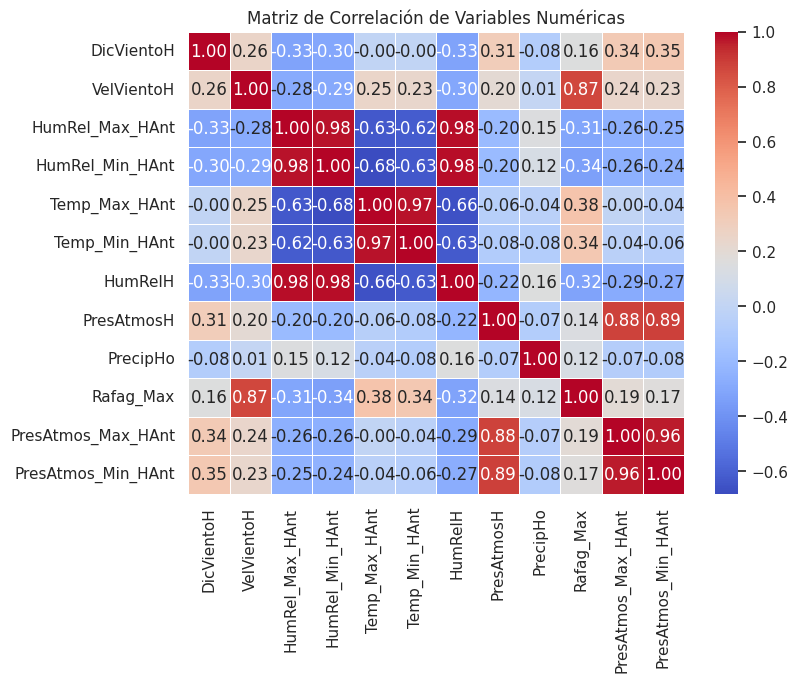

In [475]:
correlation_matrix = dfWind.select_dtypes(include=['int', 'float']).corr()

# Configurando el estilo de seaborn
sns.set(style="white")

# Creando la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()



- HumRel_Max_HAnt tiene una correlación muy alta con HumRel_Min_HAnt y HumRelH , con valores de 0.98 y 0.98 respectivamente. Esto indica que, como era de esperar, la humedad relativa tiende a variar de manera similar tanto para los valores máximos como mínimos durante un período de tiempo corto.

- La variable respuesta VelVientoH muestra una correlación moderada de 0.87 con Rafag_Max , lo cual tiene sentido ya que es probable que días con vientos fuertes también presenten ráfagas intensas.

- DicVientoH (Dirección del Viento) tiene una correlación muy baja o inexistente con la mayoría de las otras variables, incluyendo VelVientoH con una correlación de 0.26. Esto podría indicar que la dirección del viento no está fuertemente ligada a su velocidad o a otros factores como la humedad o la presión atmosférica en esta muestra de datos.

- HumRel_Max_HAnt, HumRel_Min_HAnt, y HumRelH tienen correlaciones muy altas entre sí, lo que podría sugerir multicolinealidad si se usan juntas en un modelo, pero también indica que son buenos indicadores de las condiciones de humedad que podrían afectar la velocidad del viento.

Dado que la variable de respuesta es VelVientoH estoy interesado en hacer un análisis especifico con respecto a en DicVientoH, HumRel_Max_HAnt, HumRel_Min_HAnt, HumRelH, y Rafag_Max dado los resultados en la matriz.




### Análisis de simetría, datos atípicos y dispersión

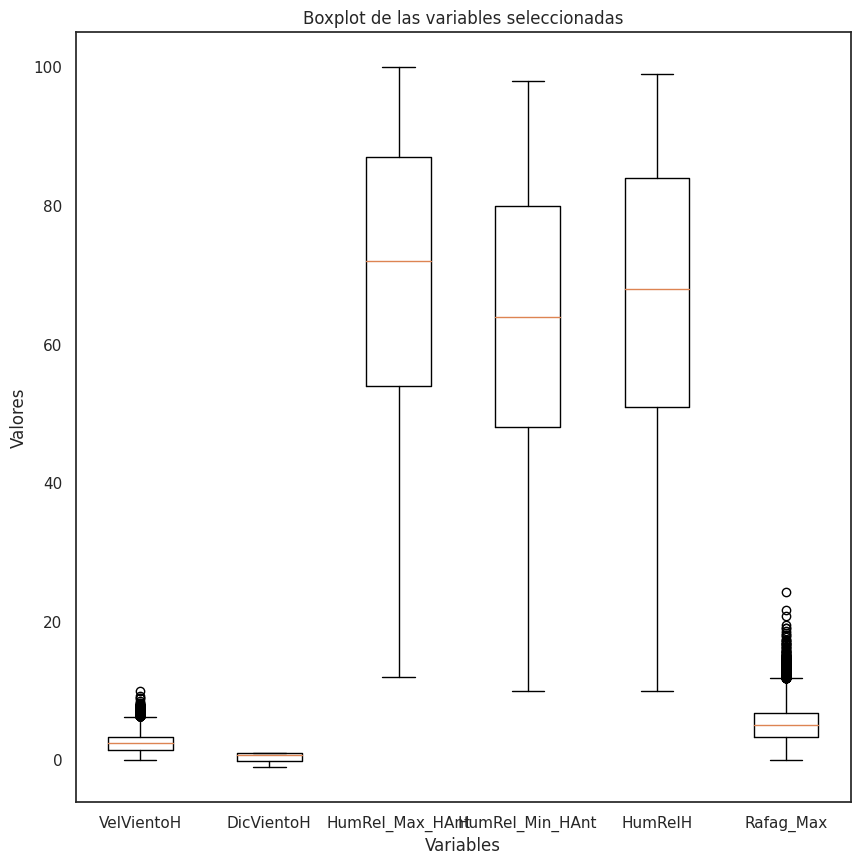

In [476]:
selected = dfWind[['VelVientoH', 'DicVientoH', 'HumRel_Max_HAnt', 'HumRel_Min_HAnt', 'HumRelH', 'Rafag_Max']]

# Crear el boxplot
plt.figure(figsize=(10, 10))
plt.boxplot(selected.values, labels=selected.columns)
plt.title('Boxplot de las variables seleccionadas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

### VelVientoH:

- **Datos atípicos:** Hay bastantes datos atípicos, todos en el rango inferior. Esto significa que hay momentos en los que la velocidad del viento es inusualmente baja.
- **Sesgo:** El boxplot muestra un sesgo positivo leve, dado que la mediana está más cerca del primer cuartil que del tercer cuartil, y los bigotes están desequilibrados, siendo el superior más corto.
- **Variabilidad:** La variabilidad parece ser baja, ya que la caja es relativamente pequeña.

### DicVientoH:

- **Datos atípicos:** No hay datos atípicos visibles en este boxplot.
- **Sesgo:** Parece haber un sesgo positivo muy leve, ya que la mediana está ligeramente más cerca del primer cuartil.
- **Variabilidad:** La variabilidad es baja a moderada, como se indica por el tamaño de la caja.

### HumRel_Max:

- **Datos atípicos:** No hay datos atípicos presentes.
- **Sesgo:** El boxplot es bastante muestra un sesgo positivo pronunciado.
- **Variabilidad:** Existe una variabilidad moderada, con un rango intercuartílico más amplio que los boxplots anteriores.

### HumRel_Min:

- **Datos atípicos:** No hay datos atípicos presentes.
- **Sesgo:** Este boxplot es simétrico, lo que indica una distribución equilibrada de los datos alrededor de la mediana pero hay un leve sesgo positivo.
- **Variabilidad:** La variabilidad es similar a la de HumRel_Max, con un rango intercuartílico moderado.

### HumRelH:

- **Datos atípicos:** No se observan datos atípicos.
- **Sesgo:** Es similar al de **HumRel_Max** .
- **Variabilidad:** La variabilidad es moderada, y el rango intercuartílico es comparable a los de HumRel_Max y HumRel_Min.

### Rafag_Max:

- **Datos atípicos:** Hay varios datos atípicos visibles en el extremo superior, lo que indica que hay ocasiones en las que las ráfagas de viento alcanzan valores inusualmente altos.
- **Sesgo:** Hay un sesgo negativo, con la mediana más cerca del tercer cuartílico y un bigote inferior que apenas se extiende, indicando que la mayoría de los valores son bajos, pero hay una cola de valores más altos.
- **Variabilidad:** La variabilidad es baja para la mayoría de los datos, pero los datos atípicos sugieren que ocasionalmente hay valores extremos.


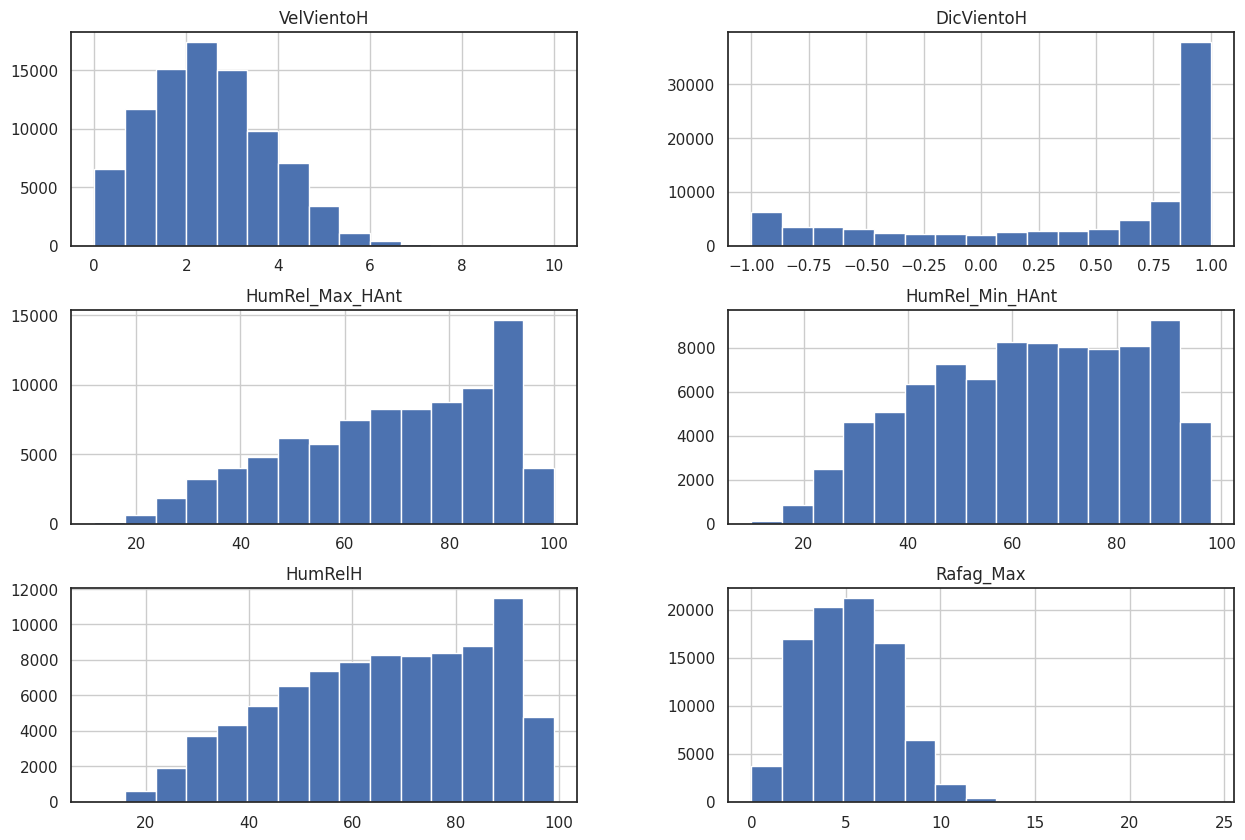

In [477]:
selected.hist(bins=15, figsize=(15, 10))
plt.show()


### DicVientoH (Dirección del Viento):
   - La distribución no es simétrica, lo que sugiere un sesgo hacia la derecha.

### VelVientoH (Velocidad del Viento):
   - La distribución es leptocúrtica, con un pico más pronunciado que una distribución normal, indicando una varianza baja con muchos datos cerca de la media por tanto el sesgo a la izquierda.

### HumRel_Max_HAnt (Humedad Relativa Máxima en la Hora Anterior):
   - Muestra un sesgo positivo pronunciado, con una acumulación de valores hacia el extremo superior del rango.
   - La curtosis es alta, indicando una distribución puntiaguda con colas delgadas, lo que significa que los valores tienden a estar cerca del máximo.

### HumRel_Min_HAnt (Humedad Relativa Mínima en la Hora Anterior):
   - Parece tener una distribución más simétrica con una ligera tendencia hacia valores más altos de humedad.
   - La distribución puede ser mesocúrtica.

 ### HumRelH (Humedad Relativa):
   - La curtosis parece ser alta, lo que indica una concentración de valores cerca del máximo posible.

 ### Rafag_Max (Ráfagas Máximas de Viento):
   - La distribución tiene un claro sesgo positivo, con más valores acumulados en el extremo inferior.
   - La curtosis es bastante alta, lo que indica que hay muchos días con ráfagas de viento suaves y unos pocos con ráfagas extremadamente fuertes.

### Análisis Bivariado

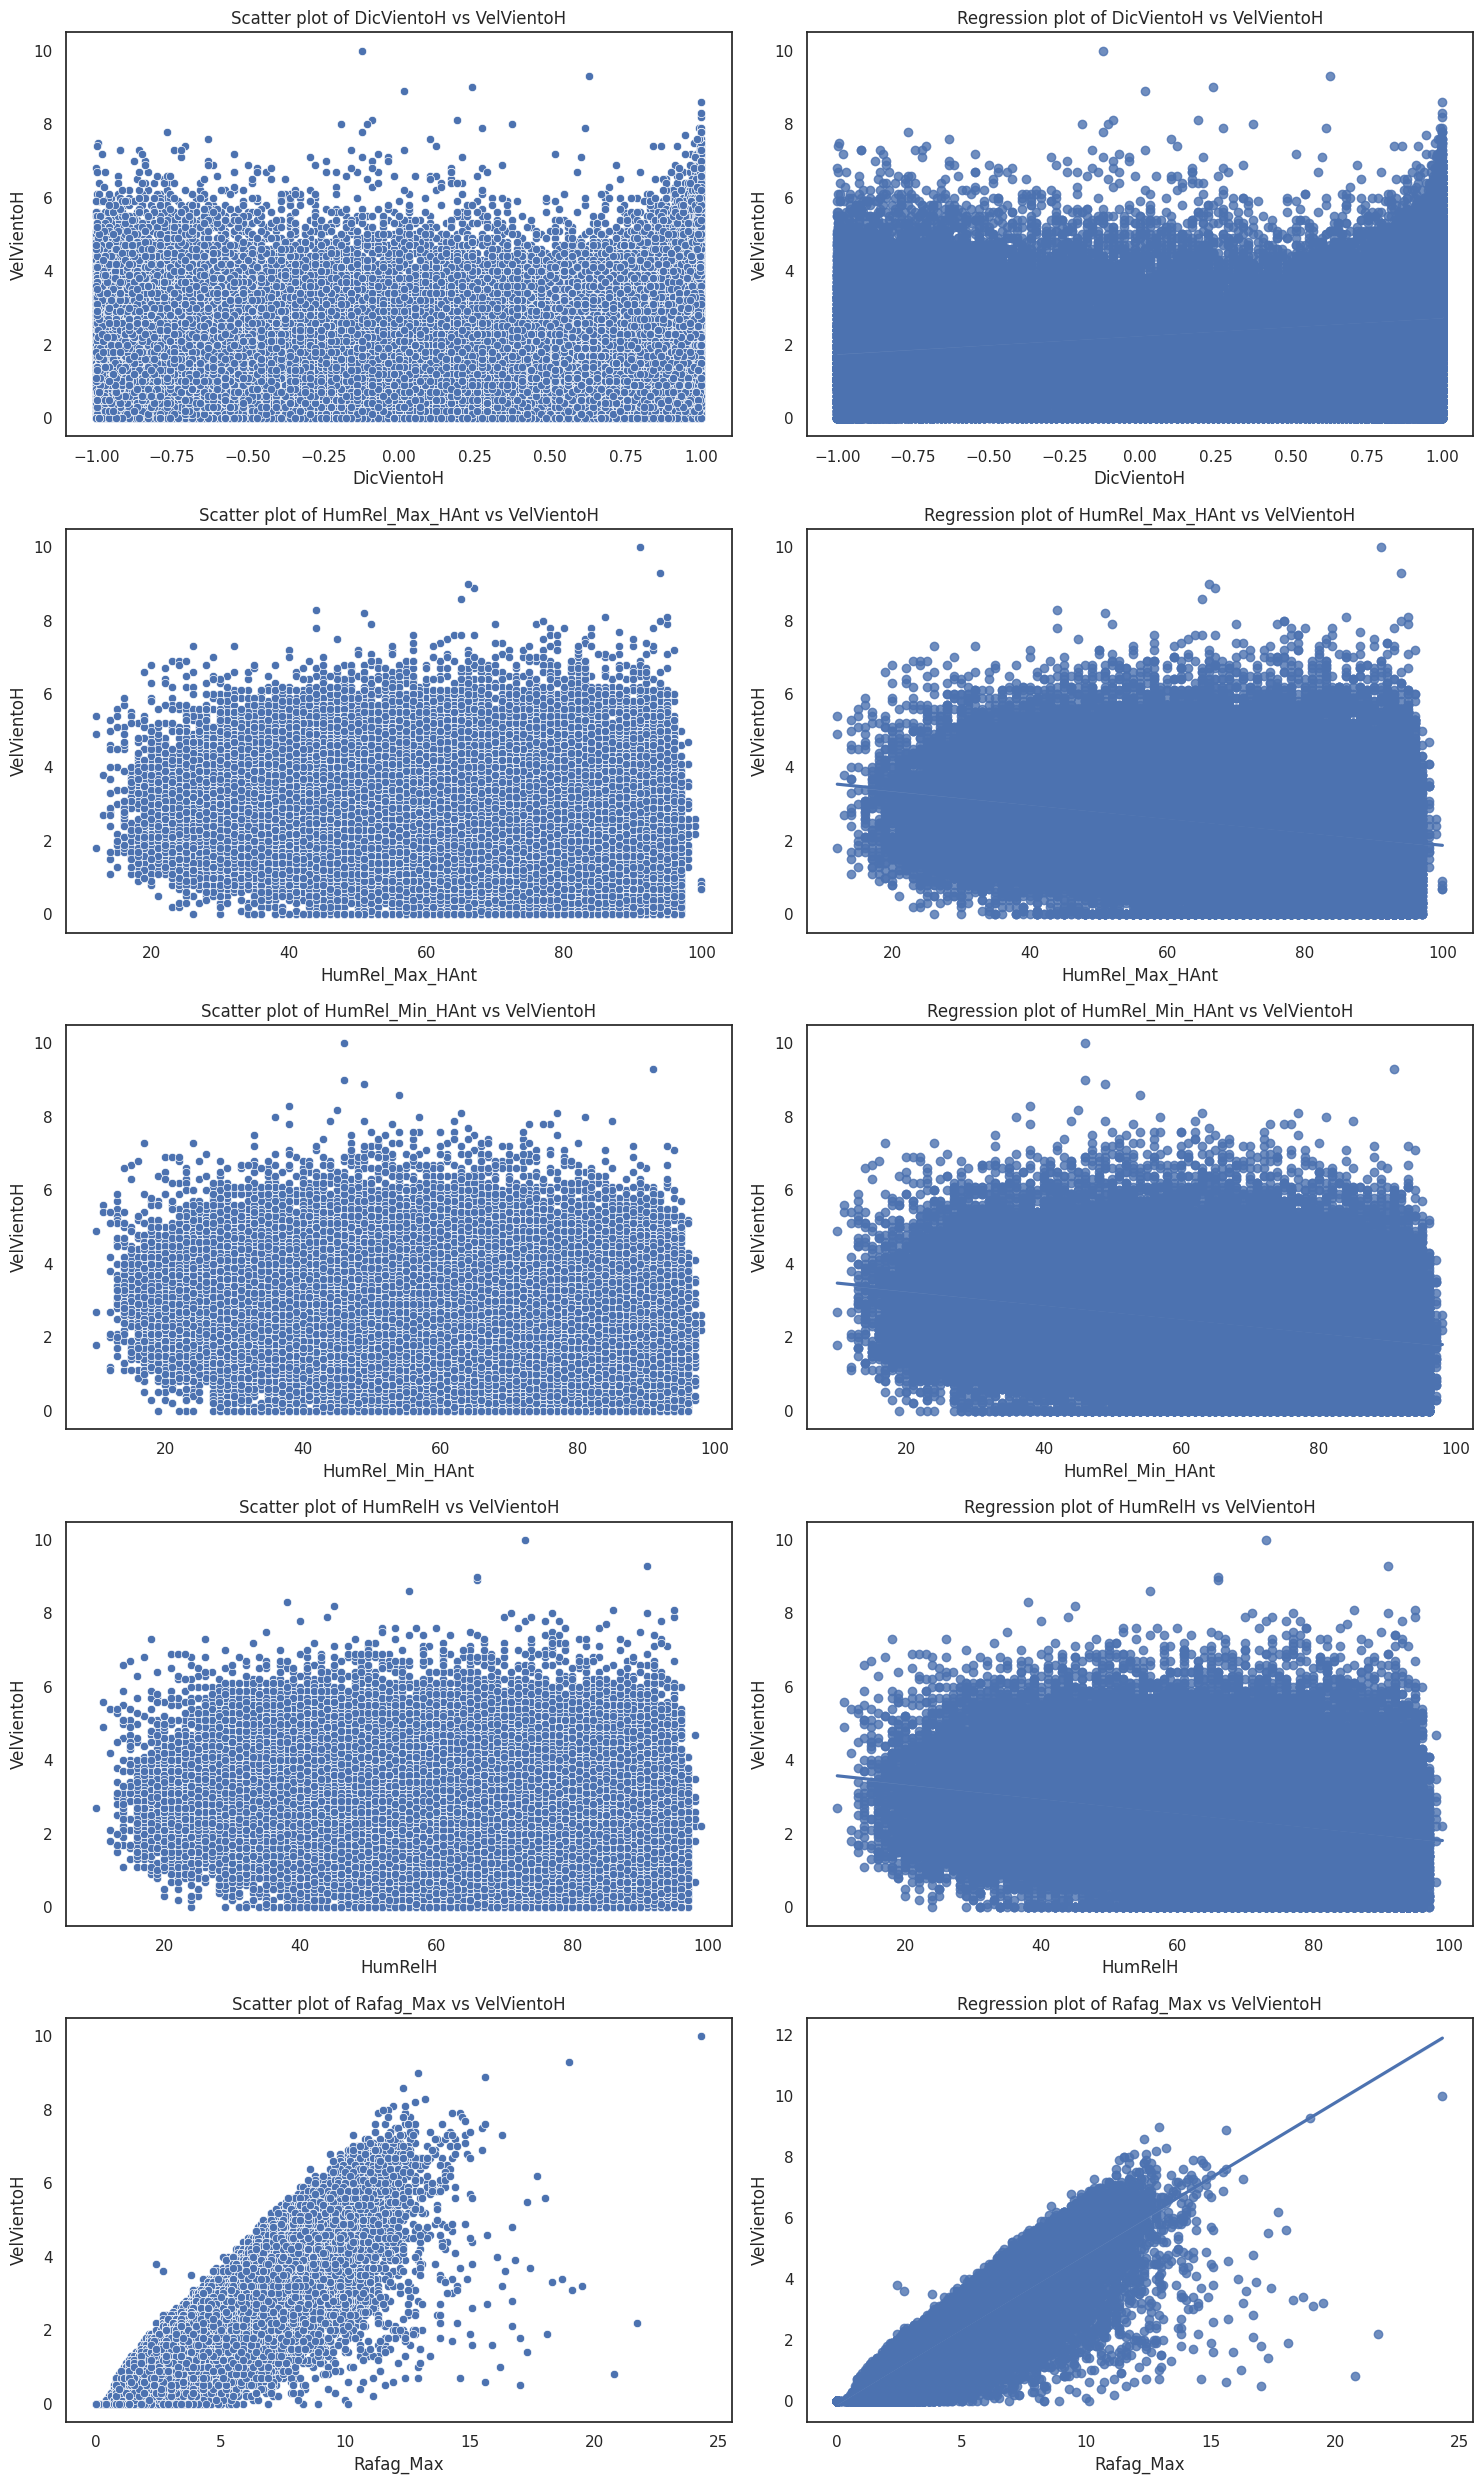

,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value
DicVientoH,0.256588,0.0,0.370495,0.0
HumRel_Max_HAnt,-0.282787,0.0,-0.314024,0.0
HumRel_Min_HAnt,-0.291752,0.0,-0.311877,0.0
HumRelH,-0.301358,0.0,-0.325641,0.0
Rafag_Max,0.868279,0.0,0.877391,0.0


In [478]:

# Las variables de interés
variables = ['DicVientoH', 'HumRel_Max_HAnt', 'HumRel_Min_HAnt', 'HumRelH', 'Rafag_Max']
y = 'VelVientoH'

# Configurar el área de trazado
fig, axs = plt.subplots(len(variables), 2, figsize=(15, 5 * len(variables)))
correlation_results = {}

# Bucle sobre cada variable para gráficos y cálculos
for i, var in enumerate(variables):
    # Scatter plot
    sns.scatterplot(x=var, y=y, data=dfWind, ax=axs[i, 0])
    axs[i, 0].set_title(f'Scatter plot of {var} vs {y}')
    
    # Regression plot
    sns.regplot(x=var, y=y, data=dfWind, ax=axs[i, 1])
    axs[i, 1].set_title(f'Regression plot of {var} vs {y}')
    
    # Calculamos las correlaciones de Pearson y Spearman
    pearson_corr, pearson_pval = pearsonr(dfWind[var], dfWind[y])
    spearman_corr, spearman_pval = spearmanr(dfWind[var], dfWind[y])
    
    # Almacenamos los resultados en un diccionario
    correlation_results[var] = {
        'Pearson Correlation': pearson_corr,
        'Pearson p-value': pearson_pval,
        'Spearman Correlation': spearman_corr,
        'Spearman p-value': spearman_pval
    }

plt.tight_layout()
plt.show()

# Convertimos los resultados de la correlación en un DataFrame para visualizarlos
correlation_df = pd.DataFrame(correlation_results).T
correlation_df


- **H_0** : No hay correlación entre ambas variables
- **H_1** : hay correlación entre ambas variables
1. **DicVientoH:**
   - Pearson: 0.2566 (correlación positiva débil)
   - Spearman: 0.3705 (correlación positiva moderada)
   - En ambos casos, el p-valor es 0.0, lo que indica que hay evidencia significativa para rechazar la hipótesis nula 

2. **HumRel_Max_HAnt:**
   - Pearson: -0.2828 (correlación negativa débil)
   - Spearman: -0.3140 (correlación negativa moderada)
   - El p-valor es 0.0 para ambas correlaciones, sugiriendo que es extremadamente improbable que estas correlaciones sean el resultado del azar.

3. **HumRel_Min_HAnt:**
   - Pearson: -0.2918 (correlación negativa débil)
   - Spearman: -0.3119 (correlación negativa moderada)
   - Con p-valores de 0.0, las correlaciones son estadísticamente significativas.

4. **HumRelH:**
   - Pearson: -0.3014 (correlación negativa débil)
   - Spearman: -0.3256 (correlación negativa moderada)
   - Los p-valores de 0.0 indican una significancia estadística en la correlación.

5. **Rafag_Max:**
   - Pearson: 0.8683 (correlación positiva fuerte)
   - Spearman: 0.8774 (correlación positiva fuerte)
   - Con p-valores de 0.0, esta es la correlación más fuerte y significativa de todas las variables examinadas.

Todas las variables mostraron una asociación estadísticamente significativa con `VelVientoH`. Con `Rafag_Max` mostrando la correlación más fuerte. Esto significa que, basándose en los datos de muestra, hay una asociación lineal entre estas variables y `VelVientoH`.

### VIF

In [479]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    VIF = pd.DataFrame()
    VIF["Variable"] = df.columns
    VIF["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF

# Preparar el DataFrame para el cálculo de VIF, eliminando cualquier valor no numérico y manejo de valores faltantes
df_numeric = dfWind.select_dtypes(include=['float64', 'int64']).dropna()

# Eliminar la variable de respuesta 'VelVientoH' si está presente
if 'VelVientoH' in df_numeric.columns:
    df_numeric = df_numeric.drop('VelVientoH', axis=1)

# Calcular el VIF inicial
vif_data = calculate_vif(df_numeric)

# Reducir la dimensionalidad eliminando columnas con VIF ≥ 5
while vif_data['VIF'].max() >= 5:
    max_vif_var = vif_data.sort_values('VIF', ascending=False).iloc[0]
    print(f"Eliminando {max_vif_var['Variable']} con VIF: {max_vif_var['VIF']}")
    
    df_numeric = df_numeric.drop(max_vif_var['Variable'], axis=1)
    
    vif_data = calculate_vif(df_numeric)

vif_data


Eliminando PresAtmos_Min_HAnt con VIF: 965371.7239906547
Eliminando PresAtmos_Max_HAnt con VIF: 222364.72987633428
Eliminando Temp_Max_HAnt con VIF: 2402.391831924075
Eliminando HumRelH con VIF: 589.1890466437395
Eliminando HumRel_Max_HAnt con VIF: 310.1109960465707
Eliminando PresAtmosH con VIF: 131.95561756866454
Eliminando Temp_Min_HAnt con VIF: 12.640946487654055


,Variable,VIF
0,DicVientoH,1.389529
1,HumRel_Min_HAnt,3.184922
2,PrecipHo,1.039001
3,Rafag_Max,3.678934


Estos VIF más bajos sugieren que las variables listadas tienen menos problemas de multicolinealidad en comparación con las que se eliminaron.

In [494]:
variables = ['DicVientoH', 'HumRel_Max_HAnt', 'HumRel_Min_HAnt', 'HumRelH', 'Rafag_Max', 'VelVientoH']
data = dfWind.loc[:, variables]
data

,DicVientoH,HumRel_Max_HAnt,HumRel_Min_HAnt,HumRelH,Rafag_Max,VelVientoH
0,0.809017,69.0,60.0,61.0,3.8,1.8
1,0.965926,62.0,55.0,55.0,4.7,2.7
2,0.891007,56.0,50.0,51.0,4.9,2.0
3,0.848048,52.0,44.0,44.0,5.8,2.5
4,0.224951,50.0,43.0,46.0,5.8,2.4
...,...,...,...,...,...,...
87688,-0.615661,83.0,78.0,80.0,12.3,5.6
87689,-0.469472,84.0,79.0,84.0,9.9,4.9
87690,-0.484810,86.0,82.0,86.0,8.9,4.5
87691,-0.484810,88.0,85.0,88.0,8.0,3.2


In [495]:
def rolling_window_kfolds(lista, window, jump):
    folds = len(lista) - window
    # Lista para guardar los resultados
    results = []

    for fold in range(folds):
        start_idx = fold
        end_idx = start_idx + window
        end_idx_test = start_idx + 1

        
        data = lista[start_idx:end_idx]
        target = lista[end_idx: end_idx + window]
        data_test = lista[start_idx:end_idx_test]
        target_test = lista[end_idx: end_idx + jump]
        
        
        results.append({'window': data, 'target': target, 'data_test' :data_test, 'target_test': target_test })
        
        if fold == (len(lista)//window) - 1:
            break
            
            
    return results

lista = [i for i in range(len(X))] # lista para obtener los indices
results = rolling_window_kfolds(lista, window=7, jump = 1)

In [483]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from tqdm.notebook import tqdm

y = data['VelVientoH']
data = data.drop(['VelVientoH'], axis=1)  


min_rmse = np.inf
best_parameters = {}


alphas = [0.1, 1, 10]  


for alpha in tqdm(alphas):
    rmses = []

    for i, result in enumerate(results):
        X_train, y_train = data.loc[result['window']].values, y.loc[result['target']].values
        X_test, y_test = data.loc[result['data_test']].values, y.loc[result['target_test']].values

        # Crear un pipeline con Ridge
        ridge_pipeline = Pipeline([
            ('model', Ridge(alpha=alpha))
        ])


        ridge_pipeline.fit(X_train, y_train)

        y_pred = ridge_pipeline.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmses.append(rmse)

    mean_rmse = np.mean(rmses)


    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_parameters = {'alpha': alpha}


print('Ridge - Best parameters:', best_parameters)
print('Ridge - Minimum RMSE:', min_rmse)


min_rmse = np.inf
best_parameters = {}

for alpha in tqdm(alphas):
    rmses = []

    for i, result in enumerate(results):
        X_train, y_train = data.loc[result['window']].values, y.loc[result['target']].values
        X_test, y_test = data.loc[result['data_test']].values, y.loc[result['target_test']].values

        lasso_pipeline = Pipeline([
            ('model', Lasso(alpha=alpha))
        ])

        lasso_pipeline.fit(X_train, y_train)
        y_pred = lasso_pipeline.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmses.append(rmse)


    mean_rmse = np.mean(rmses)

  
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_parameters = {'alpha': alpha}

print('Lasso - Best parameters:', best_parameters)
print('Lasso - Minimum RMSE:', min_rmse)


min_rmse = np.inf
best_parameters = {}

for _ in tqdm(range(1)): 
    rmses = []

  
    for i, result in enumerate(results):
        X_train, y_train = data.loc[result['window']].values, y.loc[result['target']].values
        X_test, y_test = data.loc[result['data_test']].values, y.loc[result['target_test']].values

        # Crear un pipeline con Regresión Lineal
        linear_pipeline = Pipeline([
            ('model', LinearRegression())
        ])

  
        linear_pipeline.fit(X_train, y_train)


        y_pred = linear_pipeline.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmses.append(rmse)


    mean_rmse = np.mean(rmses)


    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_parameters = {} 
print('Linear Regression - Best parameters:', best_parameters)
print('Linear Regression - Minimum RMSE:', min_rmse)


  0%|          | 0/3 [00:00<?, ?it/s]

Ridge - Best parameters: {'alpha': 0.1}
Ridge - Minimum RMSE: 0.2034157867077786


  0%|          | 0/3 [00:00<?, ?it/s]

Lasso - Best parameters: {'alpha': 0.1}
Lasso - Minimum RMSE: 0.3180614676823436


  0%|          | 0/1 [00:00<?, ?it/s]

Linear Regression - Best parameters: {}
Linear Regression - Minimum RMSE: 0.1396505289863826


Para Ridge y Lasso, el mejor parámetro de regularización fue 'alpha': 0.1. La regresión lineal, mostró el rendimiento más sobresaliente con el RMSE más bajo de 0.1396. Ridge y Lasso tuvieron RMSEs de 0.2034 y 0.3180 respectivamente. Estos resultados indican que, para el conjunto de datos dado, la regresión lineal predice con mayor precisión la variable dependiente, sugiriendo su idoneidad para modelar la relación entre velocidad del viento en este caso.